# Visualizing the shared followers at the brainhack Warsaw

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from preprocess_data import *

/home/mboos/anaconda3/envs/brainhacktwitter/lib/python3.6/site-packages/matplotlib/style/core.py:167: UserWarning: In /home/mboos/.config/matplotlib/stylelib/mb.mplstyle: Bad val "white" on line #20
	"grid.linewidth: white
"
	in file "/home/mboos/.config/matplotlib/stylelib/mb.mplstyle"
	Key grid.linewidth: Could not convert "white" to float
  styles = read_style_directory(stylelib_path)


## Data loading
Our data comes in a dictionary in which each entry is the username of a follower of the Brainhack Warsaw account and its value is a list of all its followers.
To find the simplest similarity measure between Twitter users, we compute a matrix of binary indicators, each entry indicates if a user (indicated by the row number) is followed by another user (all _followers_ are indicated by the number of columns).

In [29]:
with open('../data/data_so_far.json', 'r') as fl:
    data_dict = json.load(fl)
data_dict = {key: map(str, val) for key, val in data_dict.items() if val is not None}
sparse_mat, vocabulary = compute_sparse_matrix_of_followers(data_dict)

## Finding ids for names of users following brainhack


In [75]:
densemat = sparse_mat.todense()
idx_of_bh_followers = np.array([vocabulary[str(idx)]+1  if str(idx) in vocabulary else 0 for idx in user_ids])
densemat_padded = np.concatenate([np.zeros((densemat.shape[0], 1)), densemat], axis=-1)

In [77]:
new_mat = densemat_padded[:, idx_of_bh_followers]

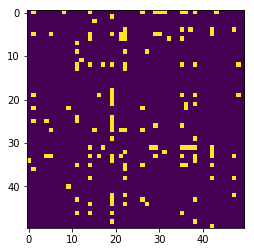

In [78]:
plt.imshow(new_mat)

In [53]:
import download_twitter_followers as brainhack
user_ids = brainhack.get_id_from_user_screennames(data_dict.keys(), brainhack.main_api)

/home/mboos/anaconda3/envs/brainhacktwitter/lib/python3.6/site-packages/tweepy/binder.py:222: ResourceWarning: unclosed <socket.socket fd=48, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('10.83.15.248', 33862), raddr=('104.244.42.194', 443)>
  self.api.last_response = resp
/home/mboos/anaconda3/envs/brainhacktwitter/lib/python3.6/weakref.py:340: ResourceWarning: unclosed <socket.socket fd=48, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('10.83.15.248', 46876), raddr=('104.244.42.2', 443)>
  super().__init__(ob, callback)
/home/mboos/anaconda3/envs/brainhacktwitter/lib/python3.6/weakref.py:340: ResourceWarning: unclosed <socket.socket fd=50, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('10.83.15.248', 33868), raddr=('104.244.42.194', 443)>
  super().__init__(ob, callback)
/home/mboos/anaconda3/envs/brainhacktwitter/lib/python3.6/weakref.py:340: ResourceWarning: unclosed <socket.socket fd=51, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('10

/home/mboos/anaconda3/envs/brainhacktwitter/lib/python3.6/site-packages/tweepy/binder.py:222: ResourceWarning: unclosed <socket.socket fd=52, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('10.83.15.248', 33932), raddr=('104.244.42.194', 443)>
  self.api.last_response = resp
/home/mboos/anaconda3/envs/brainhacktwitter/lib/python3.6/site-packages/cryptography/hazmat/backends/openssl/decode_asn1.py:342: ResourceWarning: unclosed <socket.socket fd=48, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('10.83.15.248', 55598), raddr=('104.244.42.66', 443)>
  return x509.BasicConstraints(ca, path_length)
/home/mboos/anaconda3/envs/brainhacktwitter/lib/python3.6/site-packages/cryptography/hazmat/backends/openssl/decode_asn1.py:342: ResourceWarning: unclosed <socket.socket fd=49, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('10.83.15.248', 46948), raddr=('104.244.42.2', 443)>
  return x509.BasicConstraints(ca, path_length)
/home/mboos/anaconda3/envs/brainhacktwitter

## The simplest similarity
We now compute how many followers are shared between any two users by a simple matrix multiplication.

In [31]:
shared_followers = sparse_mat.dot(sparse_mat.T).todense()
max_followers = np.zeros_like(shared_followers)
for i in range(shared_followers.shape[0]):
    for j in range(shared_followers.shape[1]):
        max_followers[i,j] = min(np.diag(shared_followers)[i], np.diag(shared_followers)[j])
normalized_followers = shared_followers / max_followers

## Embedding it in a space
We now embed all followers of Brainhack Warsaw in a two dimensional space.
For this we use dimensionality reduction to project individual users in a space that groups users with a high number of shared followers closer together than users with a low number.

In [32]:
import umap
shared_embedding = umap.UMAP(n_components=2, min_dist=0.1, metric='precomputed', n_neighbors=8).fit_transform(
    normalized_followers)

In [42]:
normalized_followers[np.diag_indices_from(shared_followers)] = 0

/home/mboos/anaconda3/envs/brainhacktwitter/lib/python3.6/site-packages/nilearn/plotting/matrix_plotting.py:99: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(mat, method=reorder)


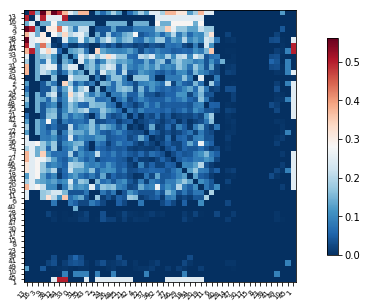

In [45]:
from nilearn.plotting import plot_matrix
plot_matrix(normalized_followers, reorder=True, labels=np.arange(50))
#plt.imshow(normalized_followers)

## Visualizing the space
We now visualize it.

In [ ]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plot.ly/ipython-notebooks/network-graphs/'> https://plot.ly/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

py.iplot(fig, filename='networkx')

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import mpld3
from sklearn.preprocessing import minmax_scale


from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper
from bokeh.palettes import plasma
from bokeh.plotting import figure
from bokeh.transform import transform

labels = sorted(data_dict.keys())
source = ColumnDataSource(data=dict(x=shared_embedding[:,0], y=shared_embedding[:,1], z=minmax_scale(
    np.diag(shared_followers), (5,30)), desc=labels))
hover = HoverTool(tooltips=[
    ('User', '@desc'),
])
mapper = LinearColorMapper(palette=plasma(256),
                           low=shared_embedding[:,1].min(), high=shared_embedding[:,1].max())

p = figure(plot_width=700, plot_height=500, tools=[hover], title="Shared followers")
p.circle('x', 'y', size='z', source=source,
         fill_color=transform('y', mapper))

output_notebook()
show(p)

/home/mboos/anaconda3/envs/brainhacktwitter/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


Loading BokehJS ...